<a href="https://colab.research.google.com/github/BuberDev/Machine_Learning/blob/main/Klasyfikator_wieloklasowy_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

import plotly.express as px
import plotly.subplots as make_subplots
import plotly.graph_objects as go



In [2]:
np.set_printoptions(precision=12, suppress=True, linewidth=120)


In [3]:
print(tf.__version__)

2.12.0


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'X_train shape:', X_train.shape)
print(f'y_train shape:',y_train.shape)
print(f'X_test shape:', X_test.shape)
print(f'y_test shape', y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape (10000,)


In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   

In [9]:
print(f'X_train[0] shape: {X_train[0].shape}')

X_train[0] shape: (28, 28)


In [8]:
X_train = X_train / 255
X_test = X_test / 255

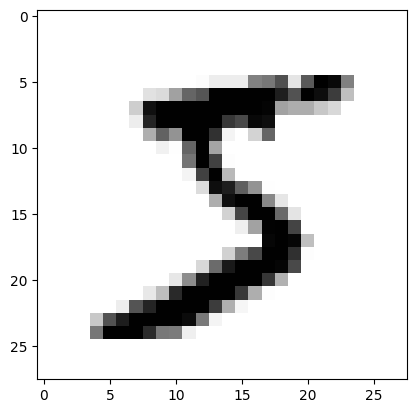

In [10]:
plt.imshow(X_train[0], cmap="gray_r")

(-0.5, 27.5, 27.5, -0.5)

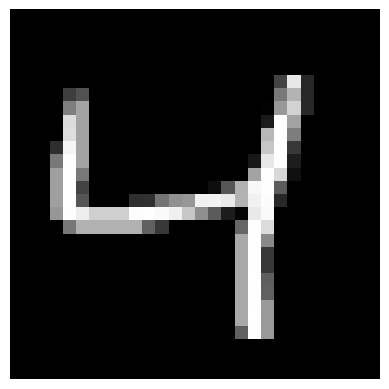

In [16]:
plt.imshow(X_train[2], cmap="gray")
plt.axis("off")

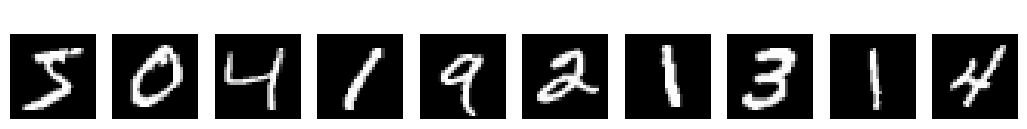

In [24]:
plt.figure(figsize=(13,13))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.axis("off")
  plt.imshow(X_train[i-1], cmap="gray")
  plt.title(y_train[i-1], color="white", fontsize=16)
plt.show()

In [26]:
#Budowa sieci neuronowej
def build_model():
  model = Sequential()
  model.add(Flatten(input_shape=(28,28)))
  model.add(Dense(units=128, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(units=10, activation="softmax"))

  model.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

  return model

model = build_model()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Trenowanie modelu

model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 11s 3ms/step - loss: 0.3262 - accuracy: 0.9044 - val_loss: 0.1596 - val_accuracy: 0.9542
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1596 - accuracy: 0.9526 - val_loss: 0.1219 - val_accuracy: 0.9643
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1193 - accuracy: 0.9641 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9708 - val_loss: 0.0912 - val_accuracy: 0.9732
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0810 - accuracy: 0.9744 - val_loss: 0.0855 - val_accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0718 - accuracy: 0.9769 - val_loss: 0.0825 - val_accuracy: 0.9764
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0619 - accuracy: 0.9798 - val_loss: 0.0785 - val_accuracy

# Model Checkpoint

In [29]:
!ls
!ls -l

sample_data
total 4
drwxr-xr-x 1 root root 4096 Jun 14 18:27 sample_data


In [30]:
!pwd

/content


In [31]:
!mkdir model

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

filepath = 'model/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5'

checkpoint = ModelCheckpoint(filepath=filepath, monitor="val_accuracy", verbose=1, save_best_only=True, mode="max")

In [34]:
model = build_model()
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32, callbacks=[checkpoint])

Epoch 1/10
1496/1500 [============================>.] - ETA: 0s - loss: 0.3225 - accuracy: 0.9073
Epoch 1: val_accuracy improved from -inf to 0.95550, saving model to model/weights-01-0.9555.hdf5
1500/1500 [==============================] - 8s 4ms/step - loss: 0.3221 - accuracy: 0.9074 - val_loss: 0.1583 - val_accuracy: 0.9555
Epoch 2/10
1487/1500 [============================>.] - ETA: 0s - loss: 0.1565 - accuracy: 0.9536
Epoch 2: val_accuracy improved from 0.95550 to 0.96608, saving model to model/weights-02-0.9661.hdf5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1564 - accuracy: 0.9536 - val_loss: 0.1142 - val_accuracy: 0.9661
Epoch 3/10
1493/1500 [============================>.] - ETA: 0s - loss: 0.1171 - accuracy: 0.9645
Epoch 3: val_accuracy improved from 0.96608 to 0.97083, saving model to model/weights-03-0.9708.hdf5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1172 - accuracy: 0.9645 - val_loss: 0.1010 - val_accuracy: 0.9708
Epoch 4